In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.statespace.varmax import VARMAX


Data Cleaning

In [12]:
df = pd.read_excel("dataframe.xlsx")
df["date"] = pd.to_datetime(df["date"], format="%Y/%m/%d")
df["date"] = df["date"].dt.strftime("%m/%Y")
df = df.set_index("date", drop = True)
df = df.dropna()
df

,wgt,ur
date,,
01/1998,4.9,4.6
02/1998,4.8,4.6
03/1998,4.6,4.7
04/1998,4.9,4.3
05/1998,5.2,4.4
...,...,...
08/2021,3.9,5.2
09/2021,4.2,4.7
10/2021,4.1,4.6


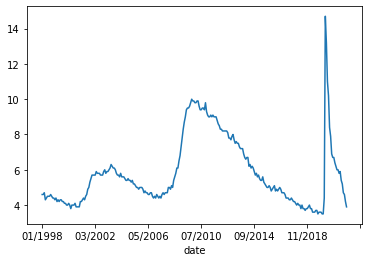

In [13]:
df["ur"].plot()
plt.show()

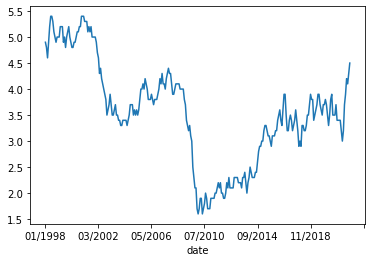

In [14]:
df["wgt"].plot()
plt.show()

Testing for Unit Root through DF Test

In [15]:
adf_wgt = adfuller(df["wgt"])
adf_wgt

# Unit Root

(-1.807323547973009,
 0.37683186501802957,
 9,
 278,
 {'1%': -3.4540935579190495,
  '5%': -2.8719934111688965,
  '10%': -2.5723401594120388},
 -309.92839592678433)

In [16]:
wgt_firstdiff = df["wgt"].diff().dropna()
adf_wgt_firstdiff = adfuller(wgt_firstdiff)
adf_wgt_firstdiff

#first differencing the unit root series
#STATIONARY

(-4.090361584328819,
 0.0010046701836451928,
 8,
 278,
 {'1%': -3.4540935579190495,
  '5%': -2.8719934111688965,
  '10%': -2.5723401594120388},
 -307.9207778624758)

In [17]:
adf_ur = adfuller(df["ur"])
adf_ur

#STATIONARY

(-2.9264267012175584,
 0.04236010768029437,
 0,
 287,
 {'1%': -3.453342167806272,
  '5%': -2.871663828287282,
  '10%': -2.572164381381345},
 557.860658697995)

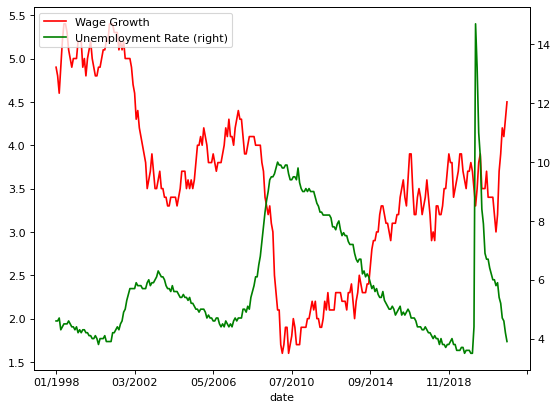

In [18]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
ax1 = df["wgt"].plot(color='red', label='Wage Growth')
ax2 = df["ur"].plot(color='green', secondary_y=True, label='Unemployment Rate')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

For Loop

In [19]:
ur = df["ur"][1:]

In [20]:
for lag in range(1,13):
    ur_series = ur.iloc[lag:]
    lagged_wgt_firstdiff = wgt_firstdiff.iloc[:-lag]
    print('LAG: %s'%lag)
    print(pearsonr(ur_series, lagged_wgt_firstdiff))
   
    print("------")

LAG: 1
(-0.1363892870728834, 0.02104130300287563)
------
LAG: 2
(-0.1463451765446671, 0.013396089870339167)
------
LAG: 3
(-0.1387344571263927, 0.019335159522999756)
------
LAG: 4
(-0.13340965757801584, 0.02480625790433632)
------
LAG: 5
(-0.108239158050763, 0.06953824386128733)
------
LAG: 6
(-0.12092350750025287, 0.0428211714031815)
------
LAG: 7
(-0.13127095985321546, 0.02807267210154488)
------
LAG: 8
(-0.16130045911882995, 0.0069369819282885225)
------
LAG: 9
(-0.16050555207392156, 0.007329041385670261)
------
LAG: 10
(-0.12600522413908638, 0.036080175830842616)
------
LAG: 11
(-0.11242423058701018, 0.06215726732802838)
------
LAG: 12
(-0.09780320843475242, 0.1055813250811139)
------


In [21]:
d = {"wgt_firstdiff":wgt_firstdiff, "ur":ur}
ur_wgt_firstdiff_df = pd.DataFrame(data=d)
ur_wgt_firstdiff_df

,wgt_firstdiff,ur
date,,
02/1998,-0.1,4.6
03/1998,-0.2,4.7
04/1998,0.3,4.3
05/1998,0.3,4.4
06/1998,0.2,4.5
...,...,...
08/2021,0.2,5.2
09/2021,0.3,4.7
10/2021,-0.1,4.6


Granger Causality Test

In [22]:
gct = grangercausalitytests(df, 13, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.3947  , p=0.0069  , df_denom=284, df_num=1
ssr based chi2 test:   chi2=7.4728  , p=0.0063  , df=1
likelihood ratio test: chi2=7.3772  , p=0.0066  , df=1
parameter F test:         F=7.3947  , p=0.0069  , df_denom=284, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.0924  , p=0.0177  , df_denom=281, df_num=2
ssr based chi2 test:   chi2=8.3305  , p=0.0155  , df=2
likelihood ratio test: chi2=8.2115  , p=0.0165  , df=2
parameter F test:         F=4.0924  , p=0.0177  , df_denom=281, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.2433  , p=0.0016  , df_denom=278, df_num=3
ssr based chi2 test:   chi2=16.1259 , p=0.0011  , df=3
likelihood ratio test: chi2=15.6862 , p=0.0013  , df=3
parameter F test:         F=5.2433  , p=0.0016  , df_denom=278, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.0497  , p=0.0006  

In [23]:
train_df=df[:-30]
test_df=df[-30:]

VAR Selection Criteria

In [24]:
model = VAR(train_df.diff()[1:])
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -7.555      -7.525   0.0005237      -7.543
1       -7.599      -7.511   0.0005010      -7.564
2       -7.657      -7.511   0.0004727      -7.598
3       -7.802      -7.597   0.0004091      -7.719
4       -7.818      -7.554   0.0004026      -7.711
5       -7.928     -7.606*   0.0003604     -7.799*
6      -7.951*      -7.570  0.0003525*      -7.797
7       -7.928      -7.489   0.0003605      -7.751
8       -7.932      -7.434   0.0003594      -7.731
9       -7.909      -7.353   0.0003675      -7.685
10      -7.906      -7.291   0.0003689      -7.658
11      -7.888      -7.215   0.0003758      -7.616
12      -7.914      -7.182   0.0003661      -7.619
13      -7.881      -7.091   0.0003786      -7.563
14      -7.874      -7.026   0.0003813      -7.532
15      -7.865      -6.958   0.0003850      -7.500
16      -7.871      -6.905   0.

/Users/federicovinci/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Fitting the VAR model VAR(7,0)

In [25]:
var_model = VARMAX(train_df, order=(7,0), enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

/Users/federicovinci/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                           Statespace Model Results                           
Dep. Variable:          ['wgt', 'ur']   No. Observations:                  258
Model:                         VAR(7)   Log Likelihood                 318.980
                          + intercept   AIC                           -571.960
Date:                Thu, 14 Apr 2022   BIC                           -454.712
Time:                        20:44:19   HQIC                          -524.814
Sample:                    01-01-1998                                         
                         - 06-01-2019                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.01, 0.00   Jarque-Bera (JB):           0.71, 3.84
Prob(Q):                        0.93, 1.00   Prob(JB):                   0.70, 0.15
Heteroskedasticity (H):         1.36, 1.17   Skew:                      -0.04, 0.04
Prob(H) (two-sided):            0.15,

/Users/federicovinci/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting

In [27]:
n_forecast = 40
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean
predictions.columns=['wgt_firstdiff','ur']
predictions[30:]

,wgt_firstdiff,ur
2022-01-01,4.413281,3.882390
2022-02-01,4.414103,3.910739
2022-03-01,4.414015,3.939441
2022-04-01,4.413394,3.968505
2022-05-01,4.412126,3.997722
2022-06-01,4.410386,4.027101
2022-07-01,4.407995,4.056609
2022-08-01,4.405033,4.086232
2022-09-01,4.401538,4.115928
2022-10-01,4.397576,4.145606
